<a href="https://colab.research.google.com/github/KenDaupsey/Linear-Discriminant-Analysis-Using-Python/blob/main/Linear_Discriminant_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Linear Discriminant Analysis ***

In [17]:
# Import necessary libraries and Load dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Linear-Discriminant-Analysis-Using-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [19]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [21]:
### Discriminant Analysis
###!pip install scikit-learn pandas

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Assuming df is your DataFrame
X = df[['read', 'write', 'math']]
y = df['prog']

# Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [22]:
# Display the group means, priors, and other information
df_group_means = pd.DataFrame(lda.means_, columns=['read', 'write', 'math'])
df_group_means['prog'] = lda.classes_
print("Group Means:")
print(df_group_means)

Group Means:
        read      write       math      prog
0  56.161905  56.257143  56.733333  academic
1  49.755556  51.333333  50.022222   general
2  46.200000  46.760000  46.420000  vocation


In [23]:
### Prior Probability Investigation
print("\nPriors:")
print(lda.priors_)


Priors:
[0.525 0.225 0.25 ]


In [24]:
### Exploring LDA Results
# Other LDA results
print("\nCoefficients:")
print(lda.coef_)


Coefficients:
[[ 0.01650927  0.01783944  0.03925604]
 [-0.01433046  0.00434986 -0.03138943]
 [-0.02177205 -0.0413777  -0.05418719]]


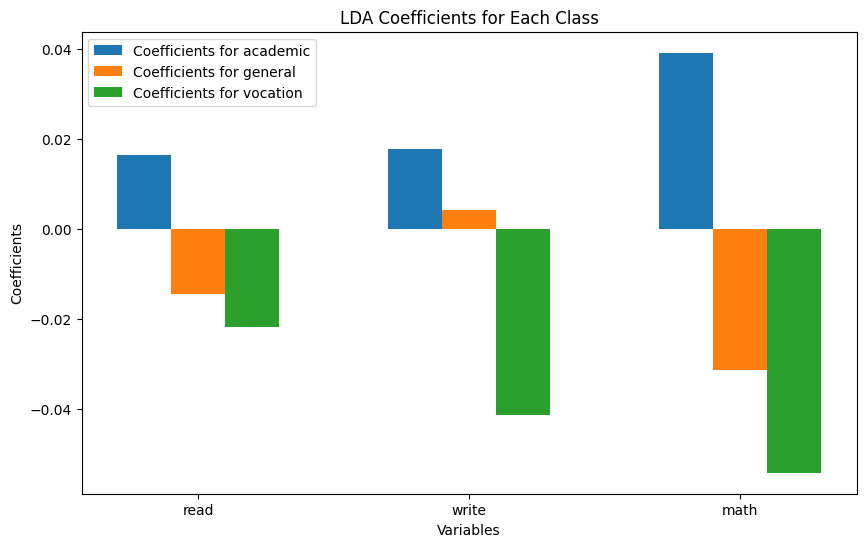

In [25]:
### Visualizing LDA Coefficients ~Vertical bar plots
import matplotlib.pyplot as plt
import numpy as np

# Variables and classes
variables = X.columns
classes = lda.classes_

# Create grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = np.arange(len(variables))

for i, label in enumerate(classes):
    ax.bar(bar_positions + i * bar_width, lda.coef_[i], width=bar_width, label=f'Coefficients for {label}')

ax.set_xticks(bar_positions + (len(classes) - 1) * bar_width / 2)
ax.set_xticklabels(variables)
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficients')
ax.set_title('LDA Coefficients for Each Class')
ax.legend()
plt.show()

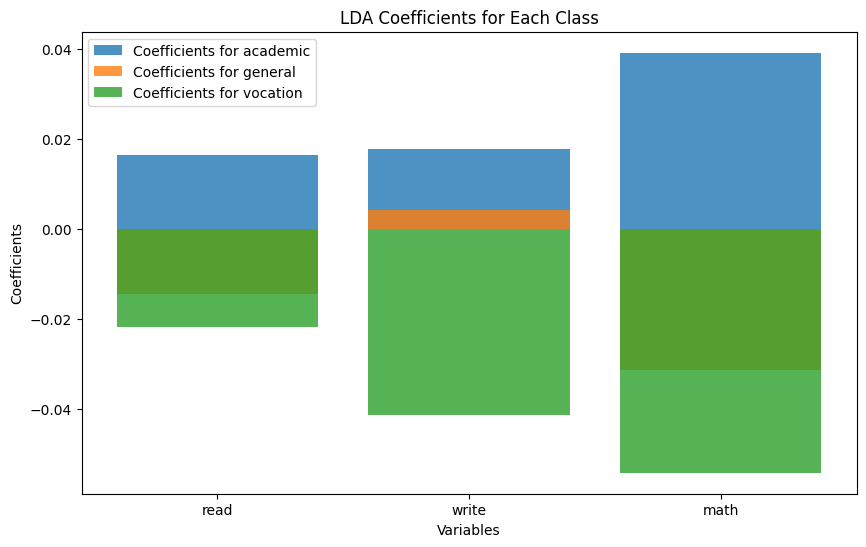

In [26]:
### Visualizing the Importance of Skills Across Groups
# Bar plot of coefficients
plt.figure(figsize=(10, 6))
for i, label in enumerate(lda.classes_):
    plt.bar(X.columns, lda.coef_[i], alpha=0.8, label=f'Coefficients for {label}')

plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('LDA Coefficients for Each Class')
plt.legend()
plt.show()

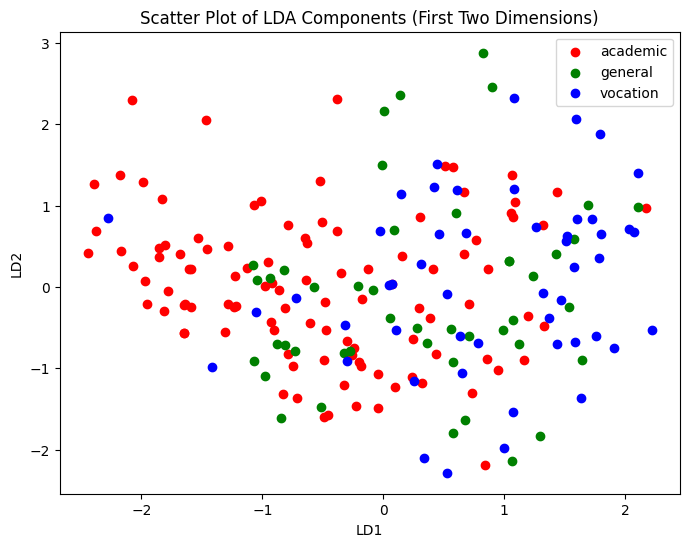

In [27]:
### a scatter plot version
import matplotlib.pyplot as plt

# Transform data to LDA components
X_lda = lda.transform(X)

# Scatter plot of the first two LDA components
plt.figure(figsize=(8, 6))

for label, color in zip(lda.classes_, ['r', 'g', 'b']):
    plt.scatter(X_lda[y == label][:, 0], X_lda[y == label][:, 1], c=color, label=label)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Scatter Plot of LDA Components (First Two Dimensions)')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

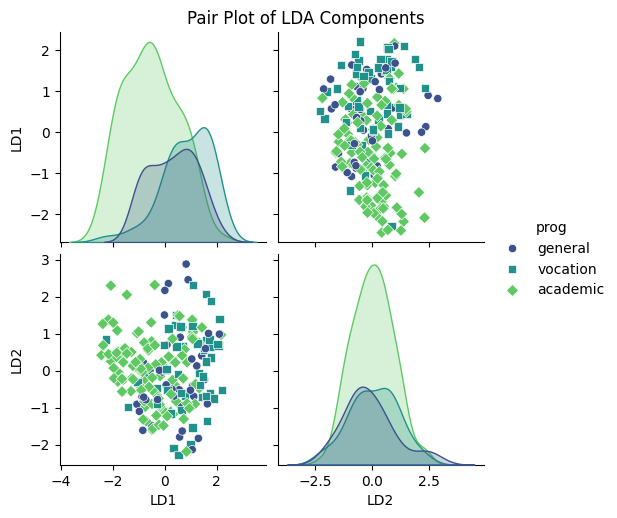

In [28]:
### Pair plot presentation with Seaborn
import seaborn as sns
import pandas as pd

# Transform data to LDA components
X_lda = pd.DataFrame(lda.transform(X), columns=['LD1', 'LD2'])

# Add the target variable to the DataFrame
X_lda['prog'] = y

# Create a pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(X_lda, hue='prog', palette='viridis', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of LDA Components', y=1.02)
plt.show()

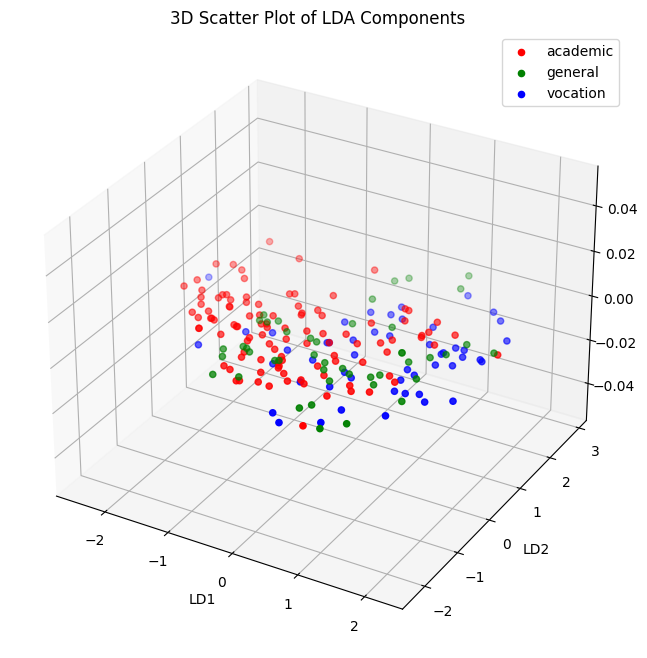

In [29]:
### 3-D plot  presentation of coefficients
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Transform data to LDA components
X_lda_3d = lda.transform(X)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(lda.classes_, ['r', 'g', 'b']):
    ax.scatter(X_lda_3d[y == label][:, 0], X_lda_3d[y == label][:, 1], c=color, label=label)

ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('3D Scatter Plot of LDA Components')
ax.legend()
plt.show()

# *** Linear Discrimant Analysis ~ Entire Code ***

Group Means:
        read      write       math      prog
0  56.161905  56.257143  56.733333  academic
1  49.755556  51.333333  50.022222   general
2  46.200000  46.760000  46.420000  vocation

Priors:
[0.525 0.225 0.25 ]

Coefficients:
[[ 0.01650927  0.01783944  0.03925604]
 [-0.01433046  0.00434986 -0.03138943]
 [-0.02177205 -0.0413777  -0.05418719]]


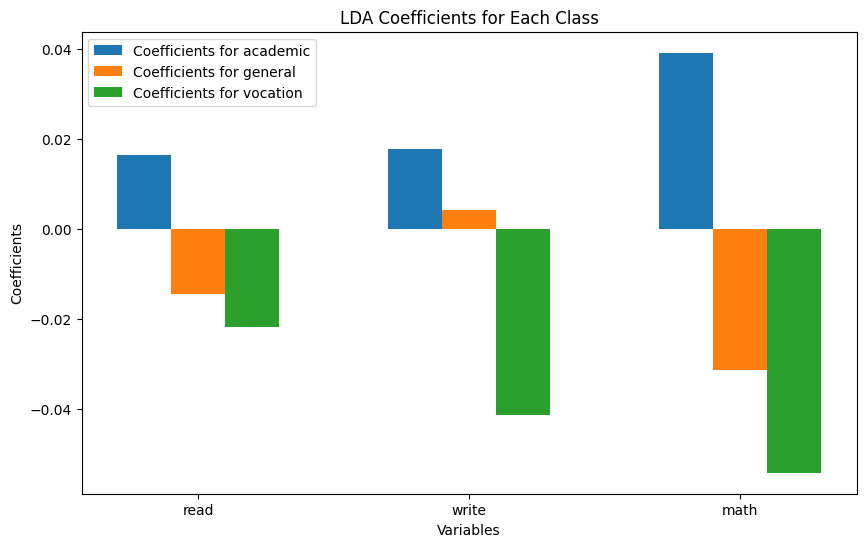

In [30]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Linear-Discriminant-Analysis-Using-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Assuming df is your DataFrame
X = df[['read', 'write', 'math']]
y = df['prog']

# Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
# Display the group means, priors, and other information
df_group_means = pd.DataFrame(lda.means_, columns=['read', 'write', 'math'])
df_group_means['prog'] = lda.classes_
print("Group Means:")
print(df_group_means)
print("\nPriors:")
print(lda.priors_)
# Other LDA results
print("\nCoefficients:")
print(lda.coef_)
import matplotlib.pyplot as plt
import numpy as np

# Variables and classes
variables = X.columns
classes = lda.classes_

# Create grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = np.arange(len(variables))

for i, label in enumerate(classes):
    ax.bar(bar_positions + i * bar_width, lda.coef_[i], width=bar_width, label=f'Coefficients for {label}')

ax.set_xticks(bar_positions + (len(classes) - 1) * bar_width / 2)
ax.set_xticklabels(variables)
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficients')
ax.set_title('LDA Coefficients for Each Class')
ax.legend()
plt.show()

# *** The End ***